In [474]:
import requests
import bs4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [433]:
#df1 = df[['dummy_1','dummy_2','dummy_3','dummy_4','dummy_5','dummy_6','media_pct','create_date','followers','friends','tweets','verified','avg_retweet','avg_favourite']]

In [434]:
#sum1 = pd.concat([df1.describe(), pd.DataFrame(df1.quantile(0.01)).T, pd.DataFrame(df1.quantile(0.05)).T,pd.DataFrame(df1.quantile(0.1)).T,pd.DataFrame(df1.quantile(0.9)).T,pd.DataFrame(df1.quantile(0.95)).T,pd.DataFrame(df1.quantile(0.99)).T,pd.DataFrame(df1.skew()).T,pd.DataFrame(df1.kurt()).T])

In [435]:
#sum1.T.to_csv("sum1.csv")

In [528]:
#df1 = df[['revenue_1','revenue_2','opincome_1','opincome_2','margin_1','margin_2','change']]
#sum2 = pd.concat([df1.describe(), pd.DataFrame(df1.quantile(0.01)).T, pd.DataFrame(df1.quantile(0.05)).T,pd.DataFrame(df1.quantile(0.1)).T,pd.DataFrame(df1.quantile(0.9)).T,pd.DataFrame(df1.quantile(0.95)).T,pd.DataFrame(df1.quantile(0.99)).T,pd.DataFrame(df1.skew()).T,pd.DataFrame(df1.kurt()).T])

In [529]:
#print(len(df1[df1['opincome_2']==0]),len(df1[df1['opincome_2']>0]),len(df1[df1['opincome_2']<0]))

In [438]:
#sum2.T.to_csv("sum2.csv")

In [439]:
df = pd.read_csv("dataset_w4.csv")

In [355]:
df.groupby('Sector').count()['Ticker']

Sector
Basic Materials            237
Communication Services     240
Consumer Cyclical          478
Consumer Defensive         197
Energy                     318
Financial                    2
Financial Services        1235
Healthcare                 963
Industrial Goods             1
Industrials                582
Real Estate                265
Services                     2
Technology                 597
Utilities                   99
Name: Ticker, dtype: int64

In [531]:
mean1 = df[['Sector','dummy_1','dummy_2','dummy_3','dummy_4','dummy_5','dummy_6','media_pct','create_date','followers','friends','tweets','verified','avg_retweet','avg_favourite','revenue_1','revenue_2','opincome_1','opincome_2','margin_1','margin_2','margin_change']].groupby('Sector').mean()
mean1.to_csv("mean1.csv")

In [450]:
df = df[(df['Sector']!= 'Financial') & (df['Sector']!= 'Industrial Goods') & (df['Sector']!= 'Services')]
df.groupby('Sector').count()['Ticker']

Sector
Basic Materials            237
Communication Services     240
Consumer Cyclical          478
Consumer Defensive         197
Energy                     318
Financial Services        1235
Healthcare                 963
Industrials                582
Real Estate                265
Technology                 597
Utilities                   99
Name: Ticker, dtype: int64

In [451]:
pd.DataFrame(df.corr()['margin_change'])

,margin_change
Unnamed: 0,0.007854
dummy_1,0.011078
dummy_2,0.009863
dummy_3,0.017280
dummy_4,0.019024
dummy_5,-0.004972
dummy_6,-0.013127
media_pct,0.009942
followers,-0.003139
friends,-0.003380


In [452]:
df1 = df[['Sector','dummy_1','dummy_2','dummy_3','dummy_4','dummy_5','dummy_6','media_pct','create_date','followers','friends','tweets','verified','avg_retweet','avg_favourite','revenue_1','revenue_2','opincome_1','opincome_2','margin_1','margin_2','margin_change']]

In [453]:
df1.columns = ['Sector','Facebook','Twitter','Linkedin','Youtube','Instagram','Wikipedia','media_pct','create_date','followers','friends','tweets','verified','avg_retweet','avg_favourite','revenue_2018','revenue_2017','opincome_2018','opincome_2017','margin_2018','margin_2017','margin_change']

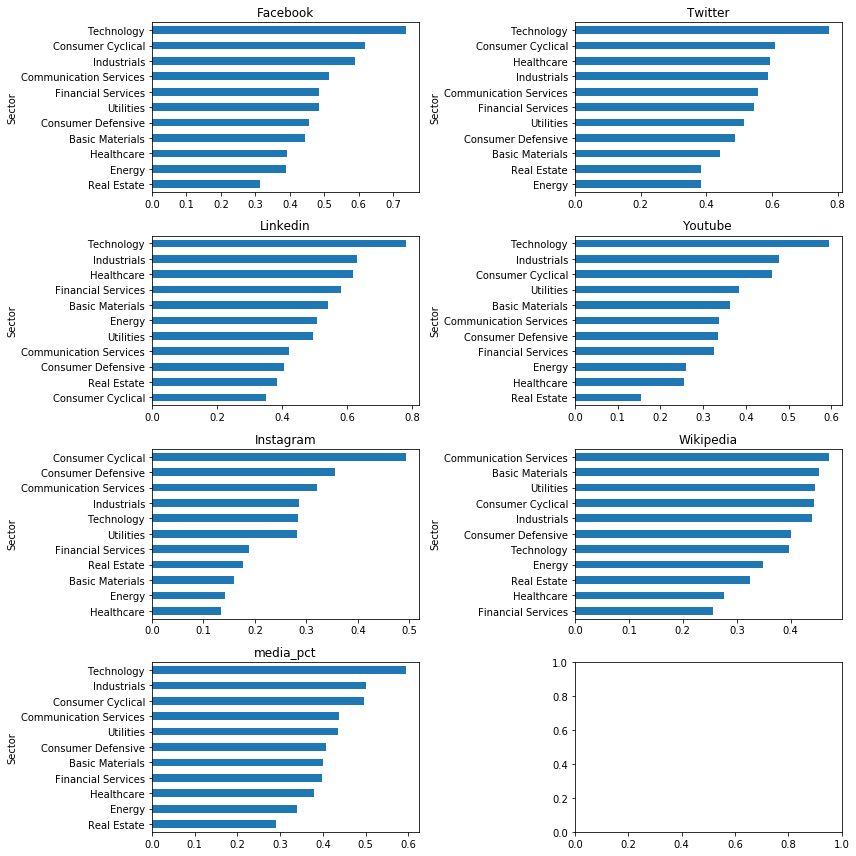

In [458]:
%matplotlib inline
COL_NUM = 2
ROW_NUM = 4
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
grouped1 = df1[['Facebook','Twitter','Linkedin','Youtube','Instagram','Wikipedia','media_pct']].groupby(df['Sector']).mean()
for i, (sector, metric_mean) in enumerate(grouped1.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    metric_mean = metric_mean.sort_values(ascending=True)
    metric_mean.plot(kind='barh', ax=ax)
    ax.set_title(sector)

plt.tight_layout() 

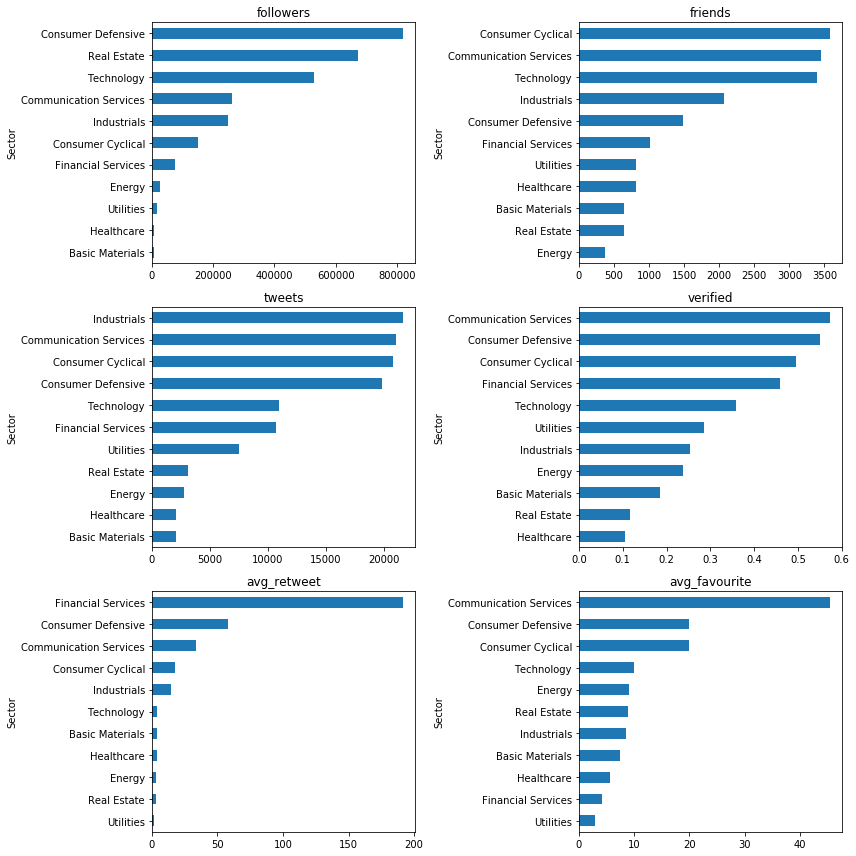

In [459]:
%matplotlib inline
COL_NUM = 2
ROW_NUM = 3
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
grouped2 = df1[['followers','friends','tweets','verified','avg_retweet','avg_favourite']].groupby(df['Sector']).mean()
for i, (sector, metric_mean) in enumerate(grouped2.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    metric_mean = metric_mean.sort_values(ascending=True)
    metric_mean.plot(kind='barh', ax=ax)
    ax.set_title(sector)

plt.tight_layout() 

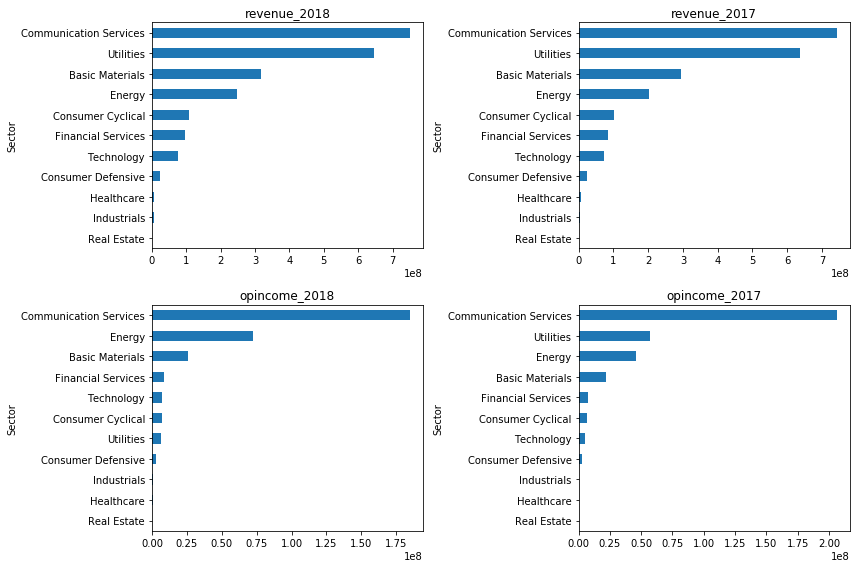

In [460]:
%matplotlib inline
COL_NUM = 2
ROW_NUM = 2
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,8))
grouped3 = df1[['revenue_2018','revenue_2017','opincome_2018','opincome_2017']].groupby(df['Sector']).mean()
for i, (sector, metric_mean) in enumerate(grouped3.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    metric_mean = metric_mean.sort_values(ascending=True)
    metric_mean.plot(kind='barh', ax=ax)
    ax.set_title(sector)

plt.tight_layout() 

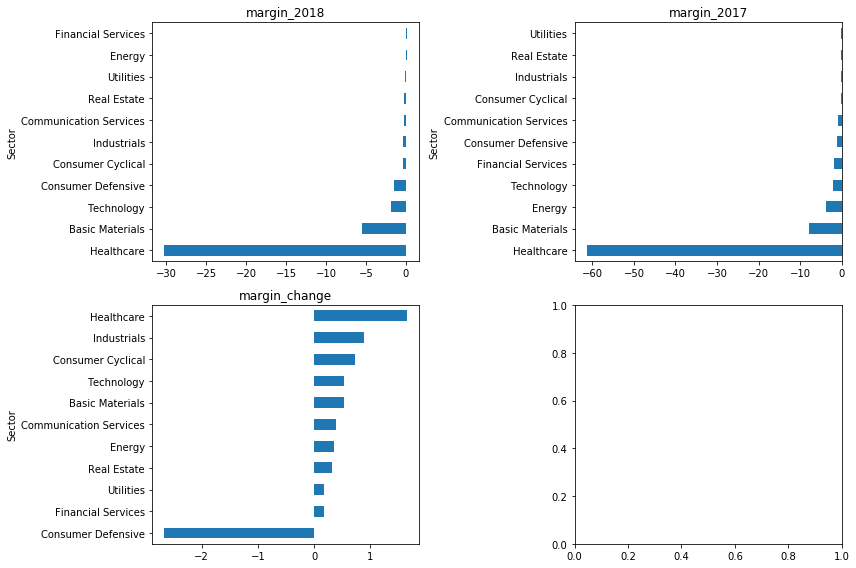

In [461]:
%matplotlib inline
COL_NUM = 2
ROW_NUM = 2
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,8))
grouped4 = df1[['margin_2018','margin_2017','margin_change']].groupby(df['Sector']).mean()
for i, (sector, metric_mean) in enumerate(grouped4.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    metric_mean = metric_mean.sort_values(ascending=True)
    metric_mean.plot(kind='barh', ax=ax)
    ax.set_title(sector)

plt.tight_layout() 

In [467]:
df2 = df1[(df1['margin_change']<100) & (df1['margin_change']>-100)]

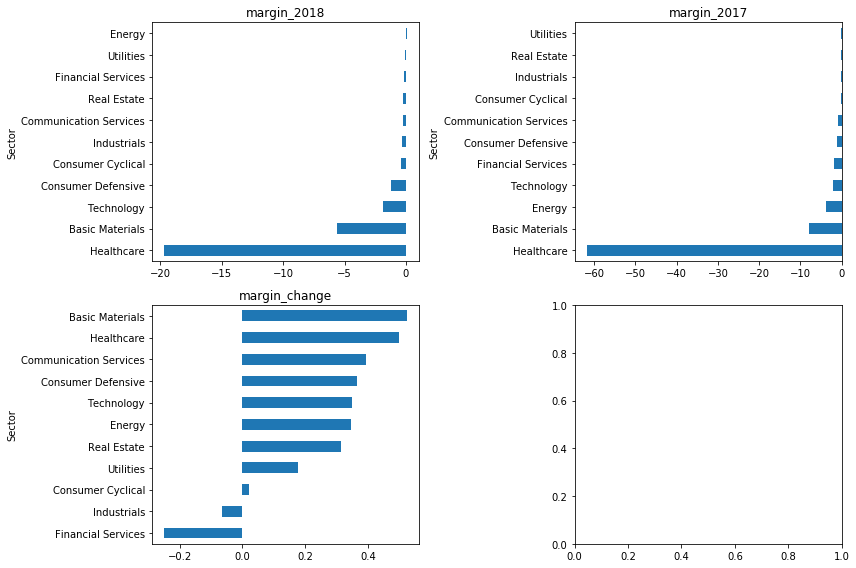

In [468]:
%matplotlib inline
COL_NUM = 2
ROW_NUM = 2
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,8))
grouped4 = df2[['margin_2018','margin_2017','margin_change']].groupby(df['Sector']).mean()
for i, (sector, metric_mean) in enumerate(grouped4.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    metric_mean = metric_mean.sort_values(ascending=True)
    metric_mean.plot(kind='barh', ax=ax)
    ax.set_title(sector)

plt.tight_layout() 

In [469]:
pd.DataFrame(df2.corr()['margin_change'])

,margin_change
Facebook,0.002482
Twitter,0.013665
Linkedin,0.012993
Youtube,-0.014312
Instagram,0.006615
Wikipedia,0.009423
media_pct,0.007525
followers,-0.011067
friends,-0.002813
tweets,0.000853


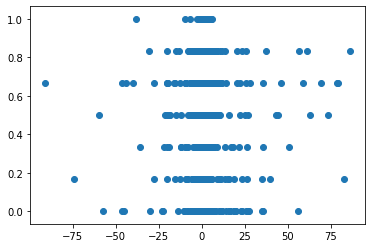

In [471]:
plt.scatter(df2['margin_change'],df2['media_pct'])

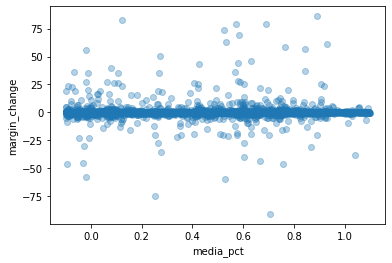

In [478]:
sns.regplot(data = df2, x = 'media_pct', y = 'margin_change', fit_reg = False,
           x_jitter = 0.1, y_jitter = 0.1, scatter_kws = {'alpha' : 1/3})

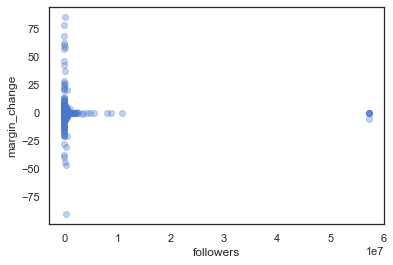

In [532]:
sns.regplot(data = df2, x = 'followers', y = 'margin_change', fit_reg = False,
           x_jitter = 0.1, y_jitter = 0.1, scatter_kws = {'alpha' : 1/3})

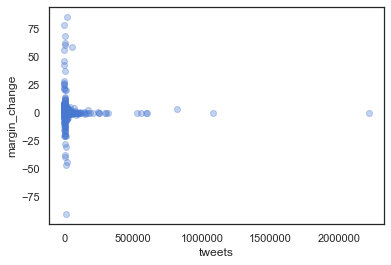

In [533]:
sns.regplot(data = df2, x = 'tweets', y = 'margin_change', fit_reg = False,
           x_jitter = 0.1, y_jitter = 0.1, scatter_kws = {'alpha' : 1/3})

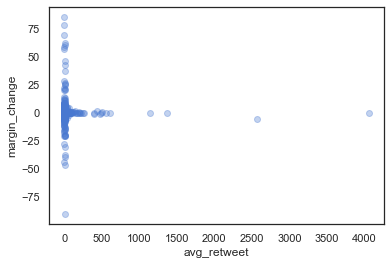

In [534]:
sns.regplot(data = df2, x = 'avg_retweet', y = 'margin_change', fit_reg = False,
           x_jitter = 0.1, y_jitter = 0.1, scatter_kws = {'alpha' : 1/3})

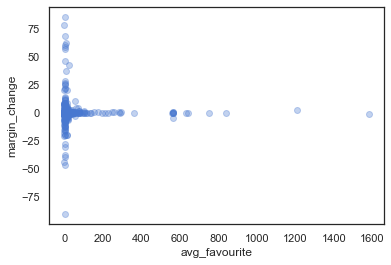

In [535]:
sns.regplot(data = df2, x = 'avg_favourite', y = 'margin_change', fit_reg = False,
           x_jitter = 0.1, y_jitter = 0.1, scatter_kws = {'alpha' : 1/3})

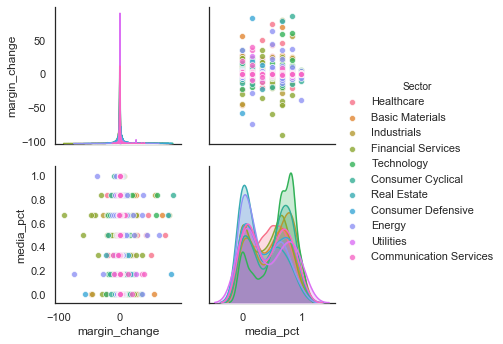

In [536]:
sns.pairplot(df2[['Sector','margin_change','media_pct']],hue="Sector",diag_kind="kde",
            plot_kws={'alpha':0.8})